# Twitter Sentiment Exploratory Data Analysis

This project focuses on analyzing and extracting sentiment from tweets posted on the social media platform Twitter. The goal is to gain insights into the sentiments expressed in tweets and develop a model that can accurately predict the sentiment associated with a given tweet.

The process  involves several key steps:

* Data Collection: Gathering a dataset of tweets that includes both the text of the tweet and the corresponding sentiment labels. This dataset will be used for analysis and model training.

* Sentiment Extraction: Extracting the sentiment or emotion conveyed in each tweet. This can involve determining whether a tweet expresses a positive, negative, or neutral sentiment.

* Exploratory Data Analysis (EDA): Performing an in-depth exploration of the collected data to uncover patterns, trends, and relationships. EDA helps understand the characteristics of the data, identify any data quality issues, and gain insights that can inform subsequent analysis and model development.

* Feature Engineering: Transforming the raw tweet text into meaningful features that can be used as input for the sentiment analysis model. This can include techniques like tokenization, normalization, and vectorization, which convert text into numerical representations that can be processed by machine learning algorithms.

* Model Development: Building a machine learning or natural language processing model that can accurately predict sentiment based on the features extracted from the tweet text. This typically involves training the model on a portion of the collected dataset and evaluating its performance using appropriate evaluation metrics.

* Model Evaluation: Assessing the performance of the sentiment analysis model to determine its effectiveness in accurately predicting sentiment. This evaluation helps identify areas of improvement and fine-tune the model parameters if necessary.

The overall objective of this project is to gain insights into the sentiments expressed on Twitter, understand the factors influencing sentiment, and develop a model that can automatically classify tweets based on sentiment. This information can be valuable for various applications, such as brand monitoring, public opinion analysis, and customer sentiment analysis.

## Files

You will need three files: train.csv, test.csv, and sample_submission.csv.

The files can be obtained from the following url

https://github.com/joshzwiebel/Tweet-Sentiment-Extraction/tree/master/tweet_sentiment_extraction/Data

## Data format

Each row in the dataset contains the text of a tweet and a corresponding sentiment label. In the training set, there is an additional field called "selected_text" which represents a word or phrase selected from the tweet that best represents the provided sentiment.

When parsing the CSV files, it's important to remove any surrounding quotes from the text field to ensure they are not included in your training process.

## Target variable

Your goal is to predict the word or phrase from the tweet that accurately reflects the given sentiment. The predicted text should include all characters within that specific span, including commas, spaces, and other punctuation marks. The format for predictions should follow this structure:

```
<id>,"<word or phrase representing the sentiment>"
```

For example:

```
2,"very good"
5,"I am neutral about this"
6,"bad"
8,"if you say so!"
etc.
```

Files:

- train.csv: This file contains the training set.
- test.csv: This file contains the test set.
- sample_submission.csv: A sample submission file is provided in the correct format for reference.

Columns:

- textID: A unique ID assigned to each piece of text.
- text: The actual text content of the tweet.
- sentiment: The overall sentiment expressed in the tweet.
- selected_text: This column is only present in the training set and represents the text that supports the sentiment of the tweet.

In [128]:
#https://github.com/joshzwiebel/Tweet-Sentiment-Extraction/tree/master/tweet_sentiment_extraction/Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io # to read and write files
import requests # to get content from web pages

In [129]:
url = "https://raw.githubusercontent.com/joshzwiebel/Tweet-Sentiment-Extraction/master/tweet_sentiment_extraction/Data/train.csv"
s = requests.get(url).content # get content from url
train = pd.read_csv(io.StringIO(s.decode('utf-8'))) # read in the data

In [130]:
url = "https://raw.githubusercontent.com/joshzwiebel/Tweet-Sentiment-Extraction/master/tweet_sentiment_extraction/Data/test.csv"
s = requests.get(url).content
test = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [131]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [7]:
# check for null values
train.isnull().sum()


textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [133]:
# eliminate null values
train.dropna(inplace=True)

# check for null values
train.isnull().sum()




textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [134]:
train.describe() # summary statistics

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


<AxesSubplot: xlabel='sentiment', ylabel='count'>

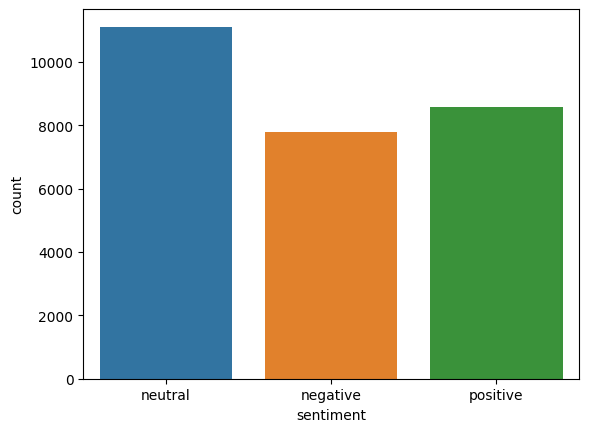

In [135]:
# frequency table for sentiment
train['sentiment'].value_counts()

# plot frequency table for sentiment
sns.countplot(x='sentiment', data=train)


In [14]:
# print frequency table for sentiment as a nice table

print(train['sentiment'].value_counts())


neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64


In [16]:
# normalize counts to get proportions using two decimal places.

print(train['sentiment'].value_counts(normalize=True).round(2))

neutral     0.40
positive    0.31
negative    0.28
Name: sentiment, dtype: float64


In [20]:
# funnel area for the frequency table of sentiment using plotly

import plotly.express as px

fig = px.funnel_area(names=train['sentiment'].value_counts().index,
                        values=train['sentiment'].value_counts().values,
                        title='Sentiment Frequency')
fig.show()




A funnel chart is a visual representation that depicts a series of stages or steps in a process, highlighting the gradual reduction or progression of data from one stage to the next. It resembles an inverted pyramid or funnel shape, with the top representing the initial stage and the bottom representing the final stage. The width of each section of the funnel corresponds to the quantity or proportion of data or values at each stage. Funnel charts are commonly used to illustrate the conversion or drop-off rates in marketing or sales funnels, showing how the number of leads or prospects decreases as they move through different stages of the conversion process. This type of chart provides a clear visual representation of the relative significance or impact of each stage and helps identify areas for improvement or optimization in the funnel process.


In [137]:
#compute the jaccard similarity for the training data using the text and selected_text columns

def jaccard_similarity(str1, str2):
    a = set(str1.lower().split())
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


train['jaccard'] = train.apply(lambda x: jaccard_similarity(x['text'], x['selected_text']), axis=1)

train.head()

,textID,text,selected_text,sentiment,jaccard
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286


The Jaccard score, also known as the Jaccard index or intersection over union, measures the similarity between two sets by calculating the ratio of the intersection to the union of the sets.

In [138]:
# compute the number of words in the text and selected_text columns

train['text_word_count'] = train['text'].apply(lambda x: len(str(x).split()))

train['selected_text_word_count'] = train['selected_text'].apply(lambda x: len(str(x).split()))

# compute the difference between the number of words in the text and selected_text columns

train['difference_in_word_count'] = train['text_word_count'] - train['selected_text_word_count']

train.head()

,textID,text,selected_text,sentiment,jaccard,text_word_count,selected_text_word_count,difference_in_word_count
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.214286,14,3,11


/var/folders/hq/j1mtxtzj67j363wbx6731f6r0000gn/T/ipykernel_19730/641681490.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='difference_in_word_count'>

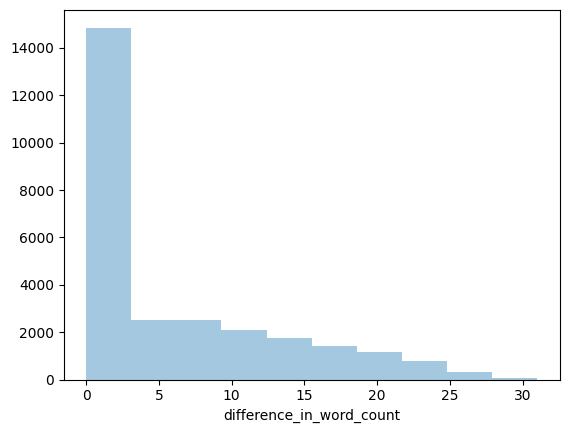

In [140]:
# histogram of the difference in word count

sns.distplot(train['difference_in_word_count'], kde=False, bins=10)



en casi la mitad de los tweets los textos seleccionados coinciden con el tweet.
No hay valores negativos, lo que quiere decir que nunca tenemos más Palabras en los textos seleccionados que en el tweet en si.
Hay un proceso de verificación que nos hemos realizado, que es determinar si efectivamente los textos seleccionados están contenidos en los tweet respectivos.

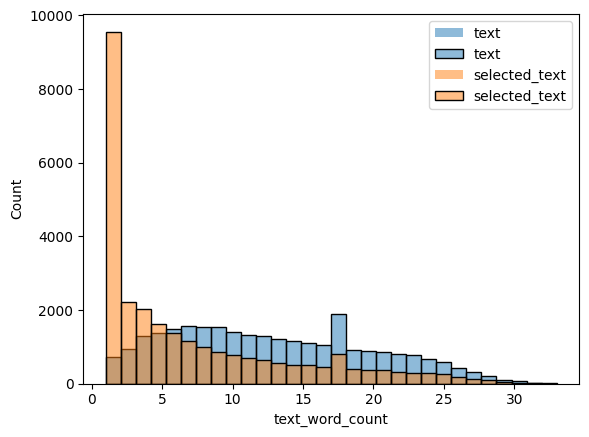

In [139]:
# plot the distribution of the text word count and selected_text word count
# histplot, sns, alpha=0.5, bins=30, no legend, show

sns.histplot(data=train, x='text_word_count', alpha=0.5, bins=30, legend=False, label='text')
sns.histplot(data=train, x='selected_text_word_count', alpha=0.5, bins=30, legend=False, label='selected_text')
plt.legend()
plt.show()

* El sentimineto de cerca de 10000 tweets (cerca de 1/3 del conjunto de datos) esta determinado por un unica palabra.
* Todos los tweets tienen al menos una palabra
* La distribucion de textos seleccionado no responde a una distribucion Gaussiana. sospecho que es power-law (funcion exponencial)
* Ambas distribuciones obedecen a una naturaleza distinta.
* No existen tweets de mas de 33 palabras
* Existen textos seleccionados que son muy extensos (cerca de 30 palabras).

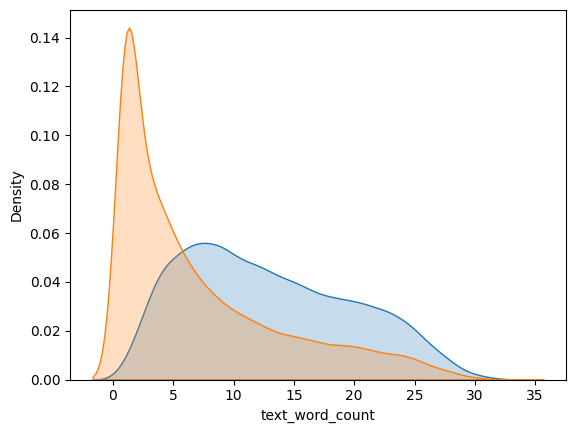

In [40]:
# plot the kernel density areas estimate of the text word count and selected_text word count
# fill

sns.kdeplot(data=train, x='text_word_count', fill=True, label='text')
sns.kdeplot(data=train, x='selected_text_word_count', fill=True, label='selected_text')
plt.show()



By examining the difference in the number of words and Jaccard scores across different sentiments, one can uncover important insights about the characteristics and accuracy of sentiment analysis. This analysis can help identify patterns in text length, assess the performance of sentiment analysis models, and potentially discover any biases or limitations in the sentiment classification process for different sentiment categories.

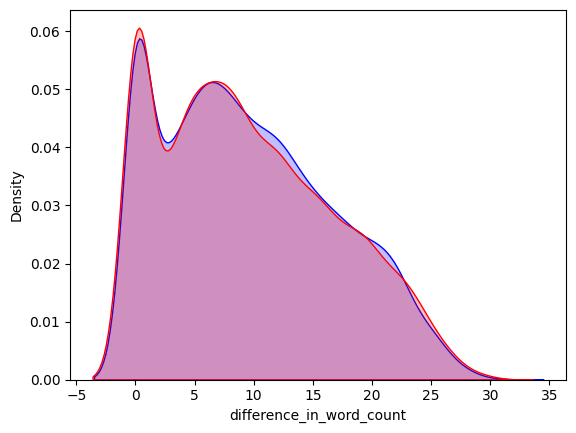

In [41]:
# kernel density estimate of the difference in word count for positive and negative tweets
# use fill, positive blue, negative red

sns.kdeplot(data=train[train['sentiment'] == 'positive'], x='difference_in_word_count', fill=True, color='blue', label='positive')
sns.kdeplot(data=train[train['sentiment'] == 'negative'], x='difference_in_word_count', fill=True, color='red', label='negative')
plt.show()




Las distribuciones son muy similares. 
El patrón más importante que puedo obtener de este gráfico es que las densidades son muy parecidas y por lo tanto queda la impresión de qué la diferencia es un mal escritor para alimentar un modelo predictivo. 
los modelos son iguales y por lo tanto es muy probable que esta variable no sea util para alimentar un modelo de aprendizaje.
Llama muchísimo la atención el eje X, y el por qué existen valores negativos en estas densidades. Es necesario estudiar en detalle la implementación para determinar aquello. Esto porque ya hemos verificado a través de un histograma que no existen diferencias negativas en la cuenta de palabras.

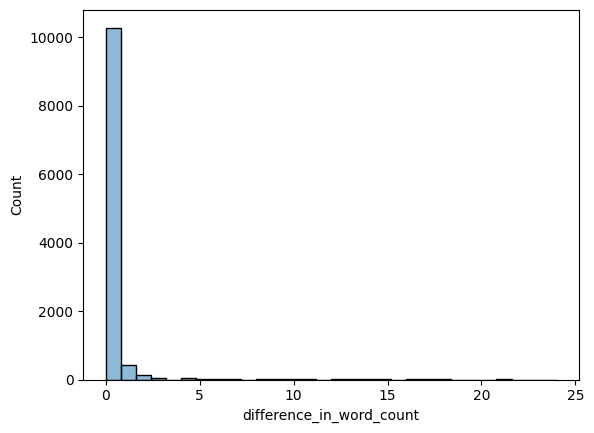

In [42]:
# histogram for neutral tweets

sns.histplot(data=train[train['sentiment'] == 'neutral'], x='difference_in_word_count', alpha=0.5, bins=30, legend=False, label='neutral')
plt.show()


* En la mayoria de los sentimientos neutrales el texto seleccionado corresponde a tweet completo.


The text and selected text for neutral tweets were identical or very similar. As a result, the KDE plot, which is commonly used to visualize the distribution of data, would not be informative in this particular scenario since the majority of the values would overlap or cluster around zero.

it would have been apparent that there is a strong correlation or similarity between the two for neutral tweets. This realization emphasizes the importance of having a clear understanding of the ultimate goal or objective of the exploratory data analysis (EDA) process. By keeping the end goal in mind, such as identifying patterns or insights related to sentiment analysis, one can make more informed decisions about which features to include or exclude and adjust the analysis accordingly. In this case, understanding the similarity between text and selected text for neutral tweets could have informed the choice not to plot the KDE for the difference in the number of words and focus on other meaningful aspects of the data.

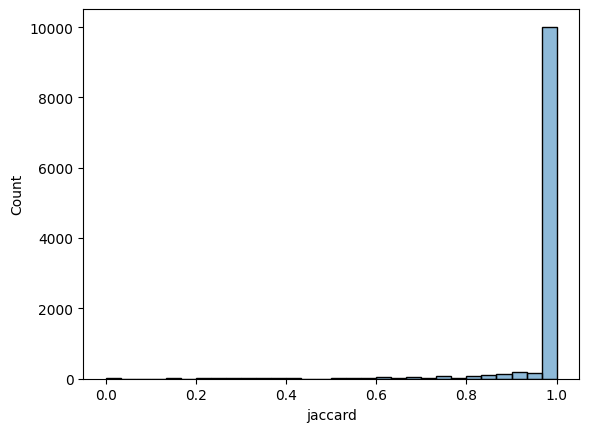

In [43]:
#histogram for jaccard score of neutral tweets

sns.histplot(data=train[train['sentiment'] == 'neutral'], x='jaccard', alpha=0.5, bins=30, legend=False, label='neutral')
plt.show()


A Jaccard score of 1.0 indicates a perfect match or complete similarity between the predicted sentiment and the actual sentiment. Therefore, if the histogram peaks mostly at 1.0 for neutral tweets, it suggests that the text of the sentiment and the selected text for neutral tweets tend to match very well.

In [44]:
# obtain the kurtosis and skewness for positive and negative tweets

from scipy.stats import kurtosis, skew

print('Positive Kurtosis: ', kurtosis(train[train['sentiment'] == 'positive']['difference_in_word_count']))
print('Positive Skewness: ', skew(train[train['sentiment'] == 'positive']['difference_in_word_count']))
print('Negative Kurtosis: ', kurtosis(train[train['sentiment'] == 'negative']['difference_in_word_count']))
print('Negative Skewness: ', skew(train[train['sentiment'] == 'negative']['difference_in_word_count']))

# obtain the kurtosis and skewness for neutral tweets

print('Neutral Kurtosis: ', kurtosis(train[train['sentiment'] == 'neutral']['difference_in_word_count']))
print('Neutral Skewness: ', skew(train[train['sentiment'] == 'neutral']['difference_in_word_count']))


Positive Kurtosis:  -0.7676129534382525
Positive Skewness:  0.4137538755705279
Negative Kurtosis:  -0.7437379129329762
Negative Skewness:  0.4426444709903767
Neutral Kurtosis:  74.51500462356555
Neutral Skewness:  8.073419112177827


Kurtosis quantifies the degree of peakedness and the spread of a distribution around its peak, while skewness measures the extent to which a curve deviates from a normal distribution.

## kurtosis and skewness for positive and negative tweets

A kurtosis value of -0.7 indicates that the distribution has a flatter or less peaked shape compared to a normal distribution. It suggests that the tails of the distribution are lighter, meaning there are fewer extreme values or outliers compared to a normal distribution. However, the degree of flatness is moderate, as the value is negative but not significantly far from zero.

A skewness value of 0.4 indicates a slight positive skew in the distribution. This means that the distribution is slightly asymmetrical, with a longer tail on the right side. The majority of the data is concentrated towards the left or lower values, while the right tail of the distribution extends further. However, the skewness value of 0.4 suggests that the deviation from a perfectly symmetrical or normal distribution is relatively small.

## kurtosis fo the neutral tweets

A Kurtosis value of 74.51500462356555 for the neutral sentiment suggests an extremely high peak or pointedness in the distribution. Kurtosis measures the shape of a distribution and compares it to a normal distribution.

In this case, the Kurtosis value of 74.51500462356555 indicates a distribution that is highly peaked and has heavy tails. It suggests that the neutral sentiment data has a significant concentration of values around the mean, with a sharp peak and a substantial deviation from a normal distribution.

Such high Kurtosis indicates that the distribution has an unusually large number of extreme values or outliers compared to a normal distribution. It suggests that the neutral sentiment data may have some unique characteristics or patterns that contribute to this pronounced shape.

## Skewness for the neutral tweets

A skewness value of 8.073419112177827 for the neutral sentiment indicates a strong positive skew in the distribution. Skewness measures the asymmetry of a distribution.

In this case, the positive skewness value suggests that the distribution of the neutral sentiment data is heavily skewed to the right. It means that the tail of the distribution extends further towards higher values, while the majority of the data is concentrated towards lower values.

A skewness value of 8.073419112177827 indicates a significant departure from a symmetrical or normal distribution, with a substantial amount of data clustering towards the left and a long tail stretching to the right. This suggests that there may be a notable presence of extremely high values or outliers in the neutral sentiment data.


In [45]:
# clean the corpus of text and selected_text

import re
import string

def clean_text(text):
    text = re.sub('\[.*?\]', '', text) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove words containing numbers
    text = re.sub('[‘’“”…]', '', text) # remove special characters
    text = re.sub('\n', '', text) # remove new line characters
    return text

train['text'] = train['text'].apply(lambda x: clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x: clean_text(x))

train.head()



,textID,text,selected_text,sentiment,jaccard,text_word_count,selected_text_word_count,difference_in_word_count
0,cb774db0d1,Id have responded if I were going,Id have responded if I were going,neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego,Sooo SAD,negative,0.200000,10,2,8
2,088c60f138,my boss is bullying me,bullying me,negative,0.166667,5,2,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,0.600000,5,3,2
4,358bd9e861,Sons of why couldnt they put them on the rel...,Sons of,negative,0.214286,14,3,11


In [57]:
# obtain the most common words in the text column

from collections import Counter

cnt = Counter()

for text in train['text'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

# print the most common words in the text column as a nice table

import pandas as pd

df = pd.DataFrame(cnt.most_common(20), columns=['word', 'count'])
df.style.background_gradient(cmap='Blues')

#plot table of most common words in text column

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['word', 'count']),
                                 cells=dict(values=[df['word'], df['count']]))
                        ])
fig.show()







In [55]:
# plot the most common words in the text column using plotly
# words in vertical axis, count in horizontal axis, show all words, use different colors for each word.

fig = px.bar(df, y='word', x='count', color='word', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()



In [58]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 21.3 MB/s eta 0:00:00


In [61]:
# remove stopwords from the text and selected_text columns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
train['selected_text'] = train['selected_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

train.head()


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1131)>


,textID,text,selected_text,sentiment,jaccard,text_word_count,selected_text_word_count,difference_in_word_count
0,cb774db0d1,Id responded I going,Id responded I going,neutral,1.000000,7,7,0
1,549e992a42,Sooo SAD I miss San Diego,Sooo SAD,negative,0.200000,10,2,8
2,088c60f138,boss bullying,bullying,negative,0.166667,5,2,3
3,9642c003ef,interview leave alone,leave alone,negative,0.600000,5,3,2
4,358bd9e861,Sons couldnt put releases already bought,Sons,negative,0.214286,14,3,11


In [73]:


# print table with most common words in text column after removing stopwords

cnt = Counter()

for text in train['text'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

df = pd.DataFrame(cnt.most_common(20), columns=['word', 'count'])


# change count to numeric

df['count'] = pd.to_numeric(df['count'])

# plot table with most common words in text column after removing stopwords

fig = go.Figure(data=[go.Table(header=dict(values=['word', 'count']),
                                    cells=dict(values=[df['word'], df['count']]))
                            ])
fig.show()




In [74]:
#plot a tree of the most common words in the text column after removing stopwords

import plotly.express as px

fig = px.treemap(df, path=['word'], values='count', color='count', hover_data=['word'],
                    color_continuous_scale='RdBu')
fig.show()


In [75]:
#plot a bar chart of the most common words in the text column after removing stopwords

fig = px.bar(df, y='word', x='count', color='word', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [76]:
# plot a tree of the most common words in for the negative tweets

cnt = Counter()

for text in train[train['sentiment'] == 'negative']['text'].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(20)

df = pd.DataFrame(cnt.most_common(20), columns=['word', 'count'])

fig = px.treemap(df, path=['word'], values='count', color='count', hover_data=['word'],
                    color_continuous_scale='RdBu')
fig.show()


In [77]:
#plot the most common negative words in a bar chart

fig = px.bar(df, y='word', x='count', color='word', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


In [92]:
# obtain the most common words in the text column for positive tweets that are not in the negative  tweets

cnt = Counter()

for text in train[train['sentiment'] == 'positive']['text'].values:
    for word in text.split():
        cnt[word] += 1
        
for text in train[train['sentiment'] == 'negative']['text'].values:
    for word in text.split():
        cnt[word] -= 1

cnt.most_common(20)

df = pd.DataFrame(cnt.most_common(20), columns=['word', 'count'])

fig = px.treemap(df, path=['word'], values='count', color='count', hover_data=['word'],
                    color_continuous_scale='RdBu')
fig.show()



the same word appears in uppercase and lowercase 

In [93]:
# to lower case

train['text'] = train['text'].apply(lambda x: x.lower())
train['selected_text'] = train['selected_text'].apply(lambda x: x.lower())

train.head()

,textID,text,selected_text,sentiment,jaccard,text_word_count,selected_text_word_count,difference_in_word_count
0,cb774db0d1,id responded i going,id responded i going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i miss san diego,sooo sad,negative,0.200000,10,2,8
2,088c60f138,boss bullying,bullying,negative,0.166667,5,2,3
3,9642c003ef,interview leave alone,leave alone,negative,0.600000,5,3,2
4,358bd9e861,sons couldnt put releases already bought,sons,negative,0.214286,14,3,11


In [94]:
# obtain the most common words in the text column for negative tweets that are not in the positive tweets

cnt = Counter()

for text in train[train['sentiment'] == 'negative']['text'].values:
    for word in text.split():
        cnt[word] += 1

for text in train[train['sentiment'] == 'positive']['text'].values:
    for word in text.split():
        cnt[word] -= 1

cnt.most_common(20)

df = pd.DataFrame(cnt.most_common(20), columns=['word', 'count'])

fig = px.treemap(df, path=['word'], values='count', color='count', hover_data=['word'],
                    color_continuous_scale='RdBu')
fig.show()

In [104]:
#donut plot of the most common words in the text column for negative tweets that are not in the positive tweets
# plot circle, color by word, values are count, labels are word, hole is 0.7, labels near the center, show all words

fig = px.pie(df, values='count', names='word', color='word', hole=0.7, labels='word', title='Most common words in negative tweets')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


In [105]:
!pip3 install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp38-cp38-macosx_11_0_universal2.whl size=217686 sha256=d97a6985aad9689c5444afa176065ff8a049bb2b36376fb8ce9d5d1cea99b596
  Stored in directory: /Users/cesar/Library/Caches/pip/wheels/91/ec/76/830440a234d211054cf724db3a3c30b66709ad1685ac9618fa
Successfully built wordcloud


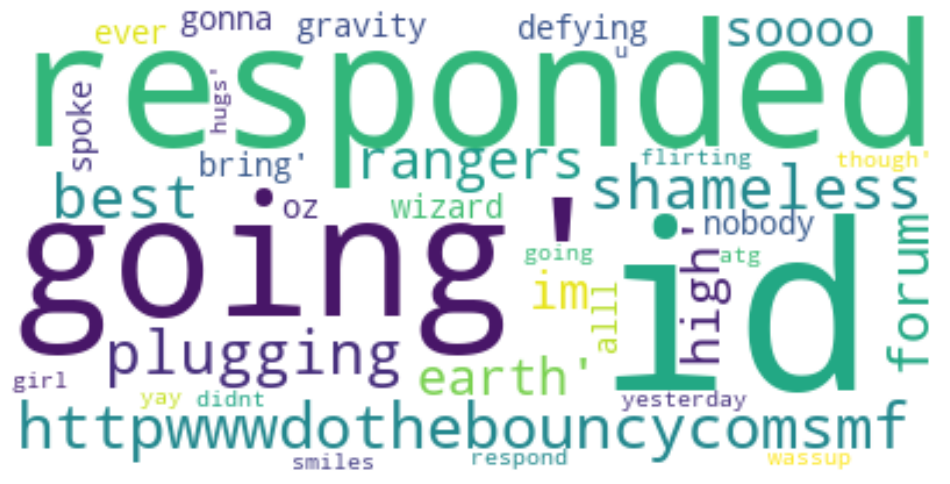

In [112]:
#wordcloud of the neutral tweets, use white background, max words 200, use stopwords, no grid, max font size 1600, max font size 100

from wordcloud import WordCloud

df = train[train['sentiment'] == 'neutral']

text = df['text'].values

wordcloud = WordCloud(background_color='white', max_words=200, stopwords=stop, max_font_size=100).generate(str(text))

fig = plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


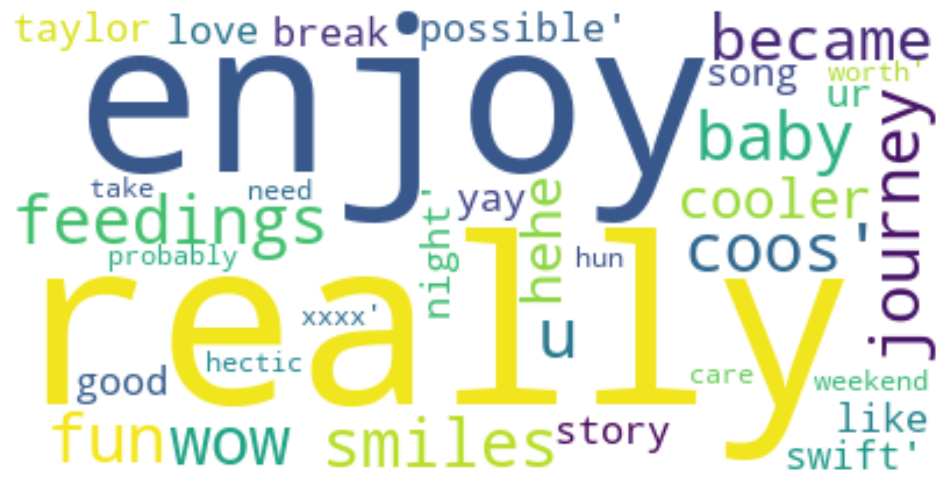

In [117]:
#wordcloud of the positive tweets, use white background, max words 200, use stopwords, no grid, max font size 100

df = train[train['sentiment'] == 'positive']

text = df['text'].values

wordcloud = WordCloud(background_color='white', max_words=200, stopwords=stop, max_font_size=100).generate(str(text))

fig = plt.figure(figsize=(12, 12))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


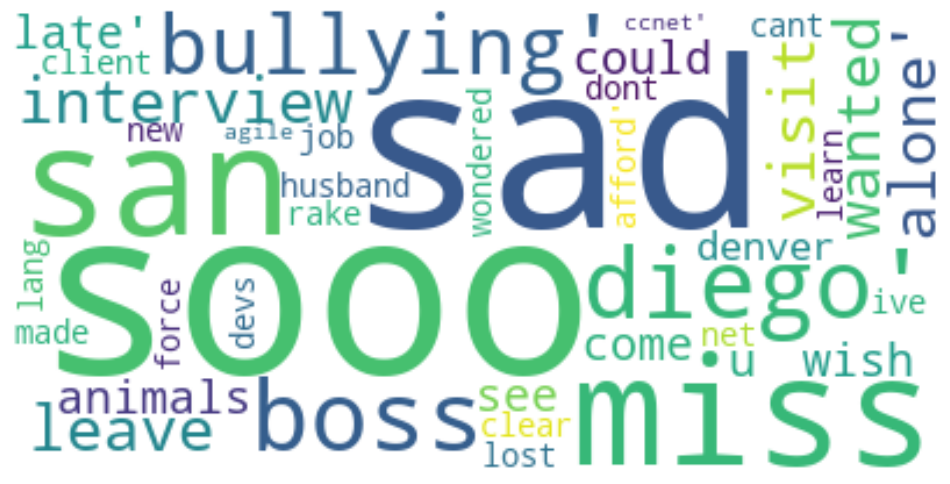

In [118]:
#wordcloud of the negative tweets, use white background, max words 200, use stopwords, no grid, max font size 100

df = train[train['sentiment'] == 'negative']

text = df['text'].values

wordcloud = WordCloud(background_color='white', max_words=200, stopwords=stop, max_font_size=100).generate(str(text))

fig = plt.figure(figsize=(12, 12))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [119]:
#apply stemming to the text column

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

train['text'] = train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split() ]))

train.head()


,textID,text,selected_text,sentiment,jaccard,text_word_count,selected_text_word_count,difference_in_word_count
0,cb774db0d1,id respond i go,id responded i going,neutral,1.000000,7,7,0
1,549e992a42,sooo sad i miss san diego,sooo sad,negative,0.200000,10,2,8
2,088c60f138,boss bulli,bullying,negative,0.166667,5,2,3
3,9642c003ef,interview leav alon,leave alone,negative,0.600000,5,3,2
4,358bd9e861,son couldnt put releas alreadi bought,sons,negative,0.214286,14,3,11


Hay que tener en consideración que se aplicó el algoritmo de Porter solamente para los Tweets, pero no para los textos seleccionados. En este caso en particular no coinciden los textos seleccionados con la información trunca del texto. La solución consiste en aplicar el timer sobre el texto seleccionado también.